**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

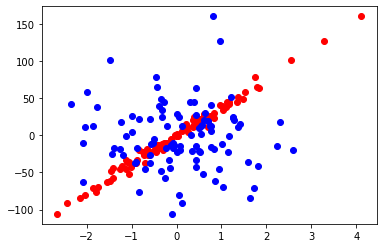

In [4]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print(test_labels)

[-105.77758163    5.86887774    1.72644759  -16.65927231  -52.37232463
  -18.86438755   49.41686419   51.87072011   22.13032804   24.82763821
   21.20540389   12.42286854  -32.92158843  -44.51417742  -16.30914909
  -80.80239408  -70.11132234  -10.27758354  -42.44469577   12.74038341
   38.36241814  -19.16792315  -40.84204295   27.83791274  -10.06708677
  126.64909941  -35.32062686   -1.42235396  -18.57607726  -48.28700118]


In [8]:
print(predictions)

[-102.75438793    4.38894135   -0.4854861   -15.04145804  -41.15619781
  -19.17911535   55.45574131   52.23259613   19.730005     30.46114985
   16.44057847    6.43871383  -34.45169828  -55.28319455  -12.41879122
  -78.95001136  -66.94880233   -8.00466593  -39.71003892    6.83085981
   41.12373766  -11.32207136  -46.8261329    22.86998669  -10.29963628
  125.49288698  -42.20911951   -0.96326284  -25.4217238   -56.59108568]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

4.087135010965755

In [10]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779699, std: 1.073710449289019


In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779699, std: 1.073710449289019


In [13]:
coef

array([38.07925837,  0.        ])

In [14]:
linear_regressor.coef_

array([38.35818335,  0.40529415])

In [15]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.7056728591840704

In [16]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [17]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.36*x1 + 0.41*x2 + -0.71


#### Lasso

In [18]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [19]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [20]:
print(lasso_regressor.coef_)

[37.51193987  0.        ]


In [21]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [22]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.51*x1 + 0.00*x2
